In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#   Подвязка данных полученных через TimeGAN
sequence_length = 40
#sequence_length = 24 #  Как в статье
numbers_sequences = 6 # Number of unique tickers

def gen_synthetic_data():
    def geplotting():
        generation = generated_data[np.random.randint(2240)][:,5]
        while generation.std() > 0.10:
            generation = generated_data[np.random.randint(2240)][:,5]
        plt.plot(generation)
        return generation
    plot_data = np.array([])
    plt.figure(figsize=(10,6))
    i = 0
    while i < 20:
        print(i)
        generation_data = geplotting()
        if (i != 0) and (max(generation_data[0] / plot_data[-1], plot_data[-1] / generation_data[0]) < 1.55):
            plot_data = np.hstack((plot_data, generation_data / (generation_data[0] / plot_data[-1])))
            i += 1
        if i == 0:
            plot_data = np.hstack((plot_data, generation_data))
            i += 1
    plt.figure(figsize=(10,6))
    #plt.plot(plot_data / max(plot_data))
    return plot_data / max(plot_data)


def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


generated_data = pd.HDFStore('../GAN_Algorithm/GAN_DATA/TimeSeriesGAN.h5').get('/data/synthetic').values.reshape(-1, sequence_length, numbers_sequences)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


<Figure size 720x432 with 0 Axes>

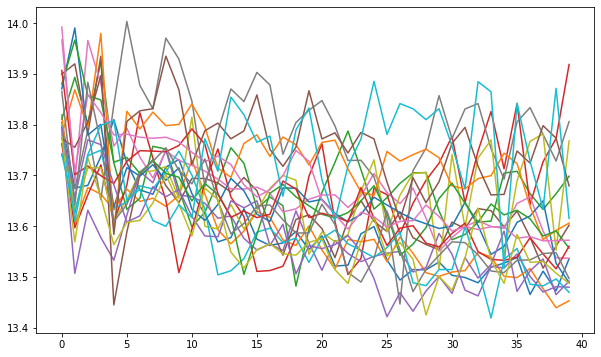

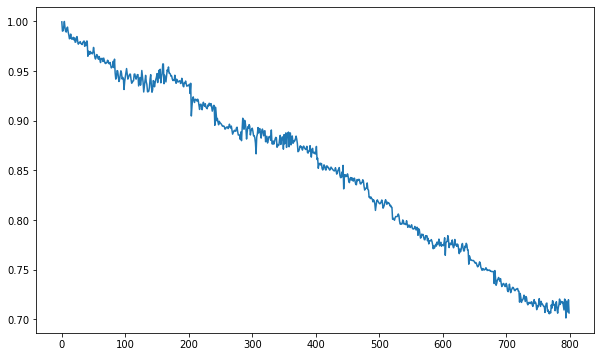

In [12]:
plt.figure(figsize=(10,6))
synth = gen_synthetic_data()
plt.plot(synth)
moving = moving_average(synth, 5)
len_moving = len(moving)